In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ct_name='Знач. наб. SNP' # clumps total
cc_name='СС (Доля наборов, содержащих причинные SNP)'
sf_name='SF (Доля найденных причинных SNP)'

In [3]:
!ls data3/*compare*

data3/PAT_ph_compare_results.tsv


In [4]:
data = pd.read_csv("data3/PAT_ph_compare_results.tsv", sep='\t')
data['params'] = '('+data.m_beta.astype(str) + ", " + data.sd_beta.astype(str) + ", " + data.gen_var.astype(str) + ", " + data.h2s.astype(str) + ")"
data

,K,m_beta,sd_beta,gen_var,h2s,theta,pIndep,phi,alpha,clumps_total,clumps_causal,clumps_not_causal,causal_found,causal_not_found,params
0,10,0.05,0.001,0.0,1.0,0.0,1.0,1,0.0,1,0.00000,1.00000,0.00000,1.00000,"(0.05, 0.001, 0.0, 1.0)"
1,30,0.05,0.001,0.0,1.0,0.0,1.0,1,0.0,1,0.00000,1.00000,0.00000,1.00000,"(0.05, 0.001, 0.0, 1.0)"
2,10,0.05,0.001,0.0,1.0,0.0,1.0,1,0.5,0,0.00000,0.00000,0.00000,1.00000,"(0.05, 0.001, 0.0, 1.0)"
3,30,0.05,0.001,0.0,1.0,0.0,1.0,1,0.5,0,0.00000,0.00000,0.00000,1.00000,"(0.05, 0.001, 0.0, 1.0)"
4,10,0.05,0.001,0.0,1.0,0.5,0.5,1,0.0,1,0.00000,1.00000,0.00000,1.00000,"(0.05, 0.001, 0.0, 1.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,30,0.50,0.200,1.0,1.0,0.5,0.5,1,0.5,63,0.39683,0.60317,0.83333,0.16667,"(0.5, 0.2, 1.0, 1.0)"
236,10,0.50,0.200,1.0,1.0,1.0,0.0,1,0.0,45,0.22222,0.77778,1.00000,0.00000,"(0.5, 0.2, 1.0, 1.0)"
237,30,0.50,0.200,1.0,1.0,1.0,0.0,1,0.0,63,0.39683,0.60317,0.83333,0.16667,"(0.5, 0.2, 1.0, 1.0)"
238,10,0.50,0.200,1.0,1.0,1.0,0.0,1,0.5,45,0.22222,0.77778,1.00000,0.00000,"(0.5, 0.2, 1.0, 1.0)"


## Clumps causal - causal found

Let: Clumps causal = CC, Causal found = SF

In [18]:
d = data.rename(columns={'clumps_causal':"CC", "causal_found": "SF", 'clumps_total': ct_name})
# d = d[d.clumps_total != 0]

darr = d.copy(deep=True)[((d.SF>0.95) & (d.CC>0.95))]
# darr = d.copy(deep=True)
# darr = darr[((d.SF>0.9) & (d.CC>0.4)) |
#  ((d.SF>0.75) & (d.CC>0.6))  |
#  ((d.SF>0.7) & (d.CC>0.75))  |
#  ((d.SF>0.5) & (d.CC>0.9))  |
#  ((d.SF>0.4) & (d.CC>0.95))  ]
darr['x']=0
darr['y']=0
darr

,K,m_beta,sd_beta,gen_var,h2s,theta,pIndep,phi,alpha,Знач. наб. SNP,CC,clumps_not_causal,SF,causal_not_found,params,x,y
28,10,0.05,0.001,0.5,1.0,0.5,0.5,1,0.0,10,1.00000,0.00000,1.00000,0.00000,"(0.05, 0.001, 0.5, 1.0)",0,0
35,30,0.05,0.001,0.5,1.0,1.0,0.0,1,0.5,30,0.96667,0.03333,0.96667,0.03333,"(0.05, 0.001, 0.5, 1.0)",0,0
148,10,0.50,0.050,0.5,1.0,0.5,0.5,1,0.0,10,1.00000,0.00000,1.00000,0.00000,"(0.5, 0.05, 0.5, 1.0)",0,0
155,30,0.50,0.050,0.5,1.0,1.0,0.0,1,0.5,30,0.96667,0.03333,0.96667,0.03333,"(0.5, 0.05, 0.5, 1.0)",0,0


In [19]:
## # manual setting
# darr.loc[139,'y']=0.025
# darr.loc[139,'x']=-0.015
# darr.loc[111,'y']=0.02
# darr.loc[147,'y']=-0.003
# darr.loc[0,'y']=-0.025
# darr.loc[104,'y']=-0.03
# darr.loc[104,'x']=-0.01
darr.sort_values(by=['CC', 'SF'], ascending=[False, False], inplace=True)
darr

,K,m_beta,sd_beta,gen_var,h2s,theta,pIndep,phi,alpha,Знач. наб. SNP,CC,clumps_not_causal,SF,causal_not_found,params,x,y
28,10,0.05,0.001,0.5,1.0,0.5,0.5,1,0.0,10,1.00000,0.00000,1.00000,0.00000,"(0.05, 0.001, 0.5, 1.0)",0,0
148,10,0.50,0.050,0.5,1.0,0.5,0.5,1,0.0,10,1.00000,0.00000,1.00000,0.00000,"(0.5, 0.05, 0.5, 1.0)",0,0
35,30,0.05,0.001,0.5,1.0,1.0,0.0,1,0.5,30,0.96667,0.03333,0.96667,0.03333,"(0.05, 0.001, 0.5, 1.0)",0,0
155,30,0.50,0.050,0.5,1.0,1.0,0.0,1,0.5,30,0.96667,0.03333,0.96667,0.03333,"(0.5, 0.05, 0.5, 1.0)",0,0


In [11]:
darr

,K,m_beta,sd_beta,gen_var,h2s,theta,pIndep,phi,alpha,Знач. наб. SNP,CC,clumps_not_causal,SF,causal_not_found,params,x,y
28,10,0.05,0.001,0.5,1.0,0.5,0.5,1,0.0,10,1.0,0.0,1.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0
148,10,0.50,0.050,0.5,1.0,0.5,0.5,1,0.0,10,1.0,0.0,1.0,0.0,"(0.5, 0.05, 0.5, 1.0)",0,0


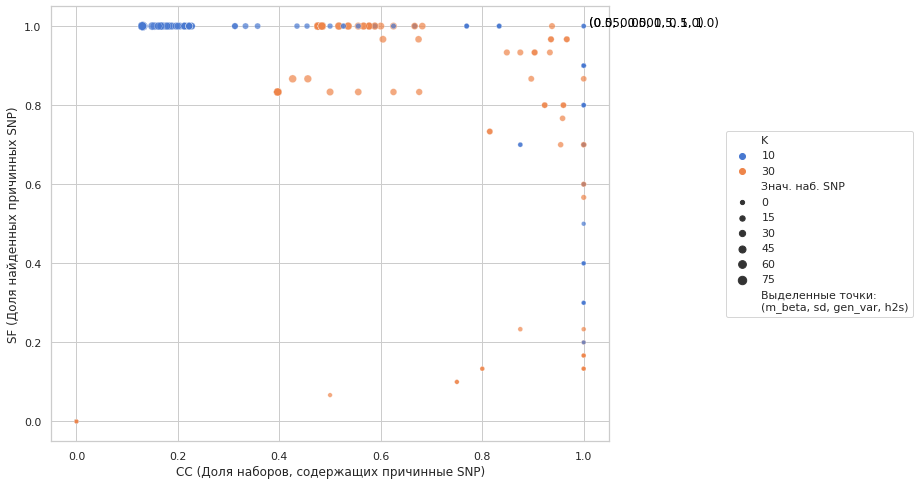

In [12]:
sns.set()
plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
ax = sns.scatterplot(d, 
                     x='CC', 
                     y='SF', 
                     hue='K', 
                     size=ct_name, 
                     palette="muted",  
                     alpha=.7,)
ax.set(xlabel=cc_name, ylabel=sf_name)

plt.plot([], [], ' ', label="Выделенные точки: \n(m_beta, sd, gen_var, h2s)")

for key, value in darr.iterrows():
    ax.text(value['CC']+0.01+value['x'], 
            value['SF']+value['y'], 
            value['params'], 
            horizontalalignment='left', 
            size='medium', 
            color='black')

plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

## Params -- CC/SF

In [13]:
def draw_violins(cur_y, cur_name, columns):
    sns.set(rc={"figure.figsize": (15, 10)})
    sns.set_theme(style="whitegrid")
    # get legend
    ax = sns.violinplot(d, 
                        x=columns[0], #!!!!!!!!!!!!!!!!!!!!! эт че
                        y=cur_y, 
                        hue='K')
    handles, labels = ax.get_legend_handles_labels()
    plt.clf()
    # draw
    fig, axs = plt.subplots(nrows=2, ncols=2)
    for i, c in enumerate(columns):
        row = i // 2
        col = i % 2
        ax = sns.violinplot(d, 
                            x=c, 
                            y=cur_y, 
                            hue='K', 
                            palette="muted",
                            alpha=.7,
                            ax=axs[row][col], 
                            legend=False,
                           cut=0)
        plt.setp(ax.collections, alpha=.88)
        ax.legend_.remove()
        ax.set(ylabel='', xlabel=c)
        ax.set(ylim=(0, 1))
    fig.supylabel(cur_name, y=0.5, x=0.07)
    fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.9, 0.5))
    plt.show()

In [14]:
columnses = [["m_beta", "sd_beta", "gen_var", "h2s"], 
            ["theta","pIndep","phi","alpha"]]

<Figure size 1080x720 with 0 Axes>

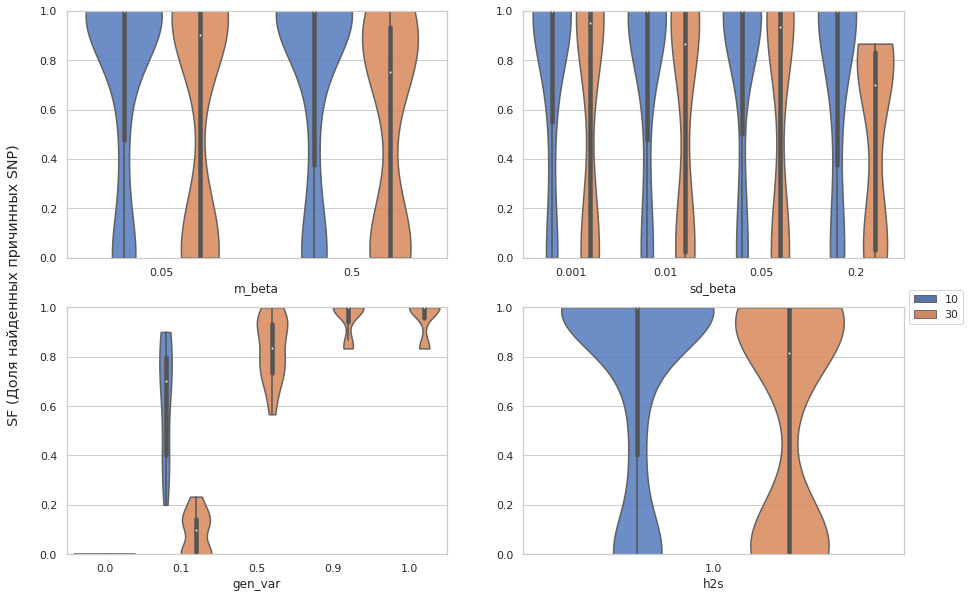

<Figure size 1080x720 with 0 Axes>

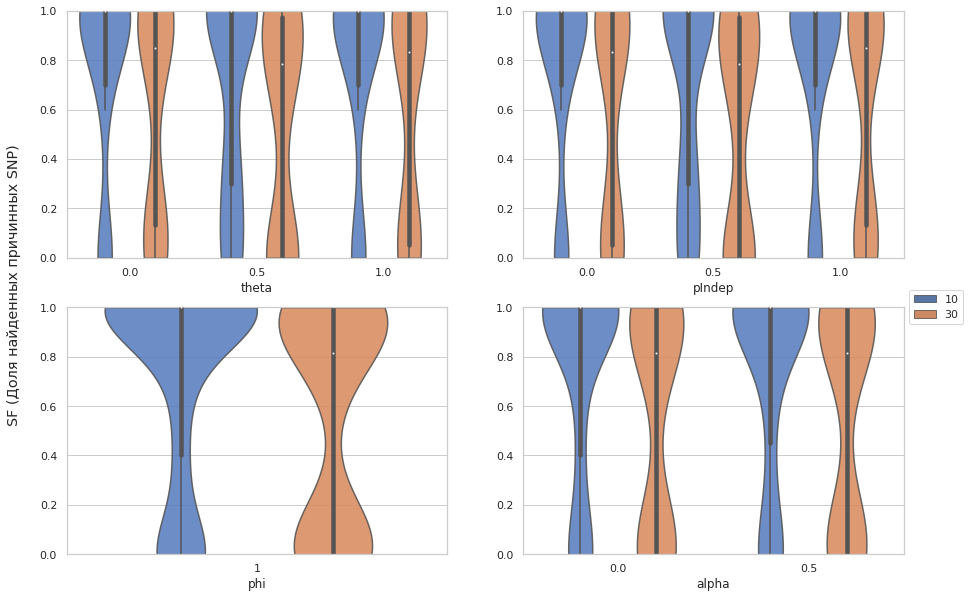

<Figure size 1080x720 with 0 Axes>

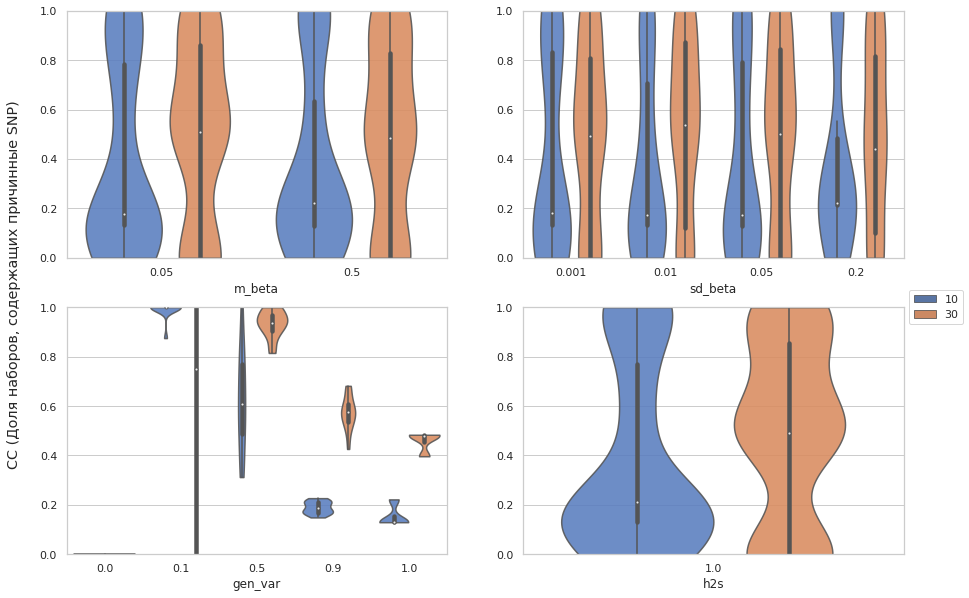

<Figure size 1080x720 with 0 Axes>

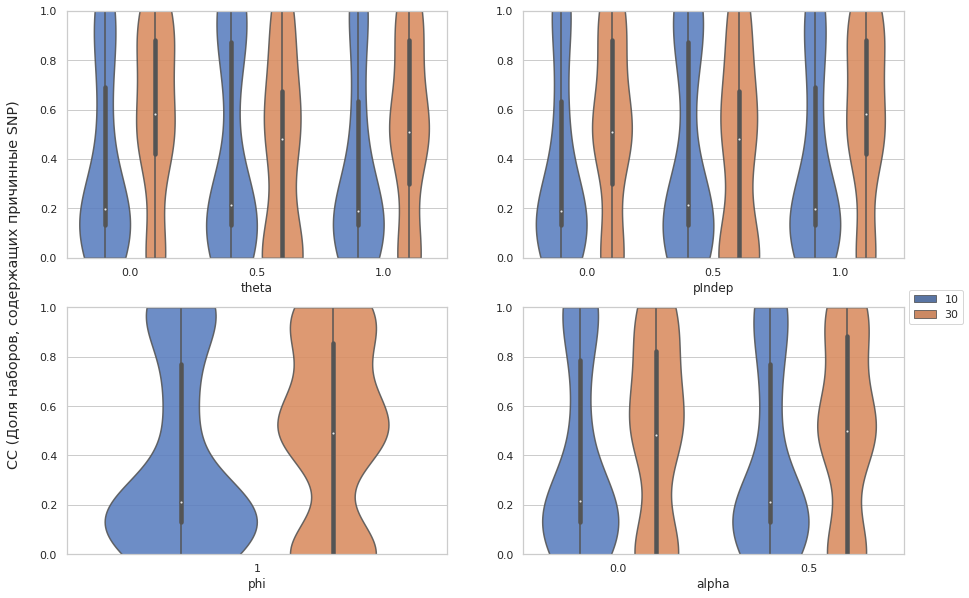

In [15]:
cur_ys = ['SF', 'CC']
cur_names = [sf_name, cc_name]

for cur_y, cur_name in zip(cur_ys, cur_names):
    for columns in columnses:
        draw_violins(cur_y, cur_name, columns)

In [ ]:
### from itertools import product
from pprint import pprint
import pandas as pd
import os
import subprocess
import re
from collections import defaultdict

from tqdm import tqdm

def run(command):
    process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True, executable='/bin/bash')
    output, error = process.communicate()
    return output, error

def flatten(l):
    return [item for sublist in l for item in sublist]

def get_snps(line):
    if line=='NONE':
        return []
    else:
        return list(map(lambda x: re.sub('\([\d]+\)', '', x), line.split(',')))


# In[24]:


CAUSAL_SNP_FILE = "data3/PAT_ph_K{}_chosen_snps.tsv"
GWAS_FILE = "data3/PAT_ph_K{}_m{m_beta}_sd{sd_beta}_gv{gen_var}_h2s{h2s}_theta{theta}_pIndep{pIndep}_phi{phi}_alpha{alpha}_gwas.tsv"
FILE_RESULTS="data3/PAT_ph_compare_results.tsv"
BFILE="data3/PAT_filt_sim"
# ## Params for one K

# In[4]:


# try these m_betas
m_betas = (
    0.05,
    0.5)
# use these sd for m_betas above respectively
sd_betas = (
    (0.001, 0.01),
    (0.05, 0.2),
)

Ks = [
     10,
    30
]

assert len(m_betas) == len(sd_betas)
# make products
m_sd_comb = []
for mb, sds in zip(m_betas, sd_betas):
    m_sd_comb += list(product([mb], sds))
# for every of combinations above, use these genvar and sd
gen_vars = (0, 0.1, 0.5, 0.9, 1)
h2ss = (1.0,)
gv_h2s_comb = list(product(gen_vars, h2ss))


theta_pIndep_comb = [(0,1), (0.5, 0.5), (1, 0)]

phi_alpha_comb = [(1, 0), (1, 0.5)]

print("These combinations of m and sd:")
pprint(m_sd_comb)
print("These combinations of gv and h2s:")
pprint(gv_h2s_comb)
print("These combinations of theta and pIndep:")
pprint(theta_pIndep_comb)
print("These combinations of phi and alpha:")
pprint(phi_alpha_comb)

params = [
    {"m_beta": m, 
     "sd_beta": sd, 
     "gen_var": gv, 
     "h2s": h2s, 
     "theta": theta, 
     "pIndep": pIndep, 
     "phi":phi, 
     "alpha":alpha}
    for (m, sd), 
    (gv, h2s), 
    (theta, pIndep), 
    (phi, alpha) in list(product(m_sd_comb, 
                                           gv_h2s_comb, 
                                           theta_pIndep_comb,
                                           phi_alpha_comb))
]
pprint(params)
print(f"Amount of parameters sets: {len(params)}")
